In [16]:
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA

In [23]:
LOAD_DIR = "/net/projects/scratch/winter/valid_until_31_July_2020/dcelik/test_data"
FILE_NAME = "ts1_1_k_3.0_27.csv"

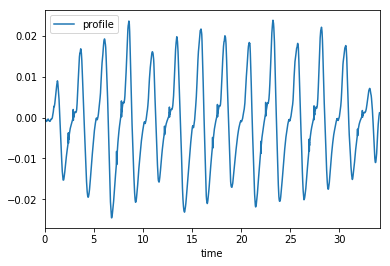

In [24]:
colnames = ["profile"]
dt = 0.005

# read data
df = pd.read_csv(LOAD_DIR + "/" + FILE_NAME, names=colnames, header=None)
# add time
df["time"] = [indx*dt for indx in range(len(df))]
df.plot(x="time", y="profile")

# Model Definition

/net/home/student/d/dcelik/.virtualenvs/IKWHack/local/lib/python3.5/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


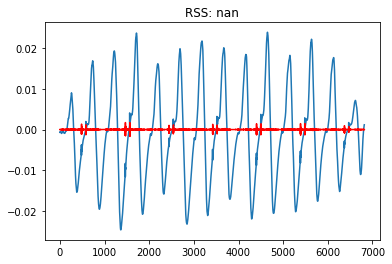

In [27]:
model = ARIMA(df["profile"], order=(2, 2, 2))  
results_ARIMA = model.fit()  
plt.plot(df["profile"])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df["time"])**2))
plt.show()